In [1]:
from pycap import PropertyTree, Charge, Discharge
import sys
sys.path.append('/notebooks')
from ragone import RagoneAnalysis, plot_ragone
from battery import Dualfoil
from matplotlib import pyplot
from pycap import initialize_data, plot_data
from pickle import dump, load
import numpy as np

%matplotlib inline

In [2]:
df = Dualfoil(path='../docker/dualfoil5-1/')
v = df.get_voltage()
ptree = PropertyTree()

### Manual Ragone plot 
for fine-tuned adjustments

In [18]:
# charge
ptree.put_double('time_step', 10)
ptree.put_string('charge_mode', 'constant_current')
ptree.put_double('charge_current', 5.0)
ptree.put_string('charge_stop_at_1', 'voltage_greater_than')
ptree.put_double('charge_voltage_limit', v)
ptree.put_bool('charge_voltage_finish', True)
ptree.put_double('charge_voltage_finish_current_limit', 1e-2)
ptree.put_double('charge_voltage_finish_max_time', 600)
ptree.put_double('charge_rest_time', 0)

In [28]:
# discharge
time_step = 15
ptree.put_double('time_step', time_step)
ptree.put_string('discharge_mode', 'constant_power')
ptree.put_double('discharge_power', 1.0)
ptree.put_string('discharge_stop_at_1', 'voltage_less_than')
ptree.put_double('discharge_voltage_limit', v-1)
ptree.put_double('discharge_rest_time', 10*time_step)

In [ ]:
charge = Charge(ptree)

data = initialize_data()
df.reset()
%time charge.run(df, data)

In [ ]:
discharge = Discharge(ptree)

#data = initialize_data()
#df.reset()
%time discharge.run(df, data)

### Cap-run Ragone plot
ragone.py altered to be more reasonable for Dualfoil

In [3]:
# ragone
ptree.put_double('discharge_power_lower_limit', 50.0)
ptree.put_double('discharge_power_upper_limit', 500.0)
ptree.put_int('steps_per_decade', 4)
ptree.put_int('min_steps_per_discharge', 10)
ptree.put_int('max_steps_per_discharge', 20)
ptree.put_double('time_step', 15.0)
ptree.put_double('initial_voltage', v)
ptree.put_double('final_voltage', v-1)

In [4]:
ragone = RagoneAnalysis(ptree)

df.reset()
%time ragone.run(df)

# Dualfoil does not terminate upon nonconvergence,
# which makes it impossible presently to generate the "dropoff"
# typically found in a ragone plot.

Charge: 0.48290010293324787 min
Discharge: 7.585356903076172 min
Charge: 14.324012764294942 min
Discharge: 4.4745166023572285 min
Charge: 14.346230041980743 min
Discharge: 2.600663689772288 min
Charge: 14.234304555257161 min
Discharge: 1.514086937904358 min
Charge: 14.121812534332275 min
Discharge: 1.017041563987732 min
CPU times: user 12.7 s, sys: 50.8 s, total: 1min 3s
Wall time: 1h 14min 42s


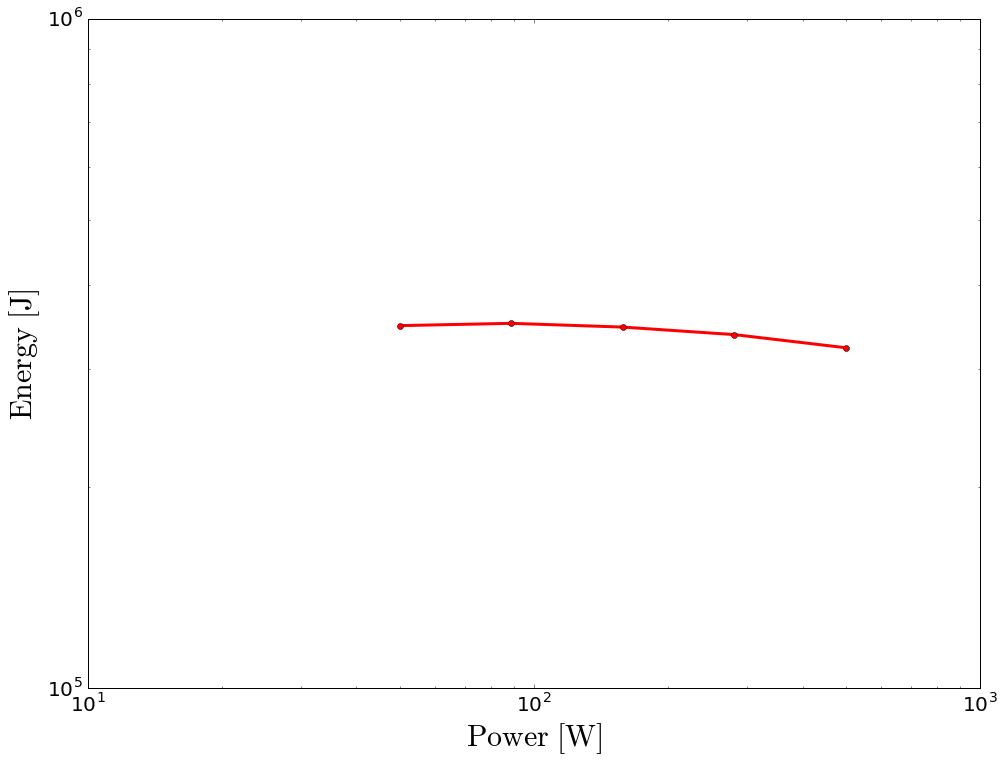

In [5]:
plot_ragone(ragone._data)

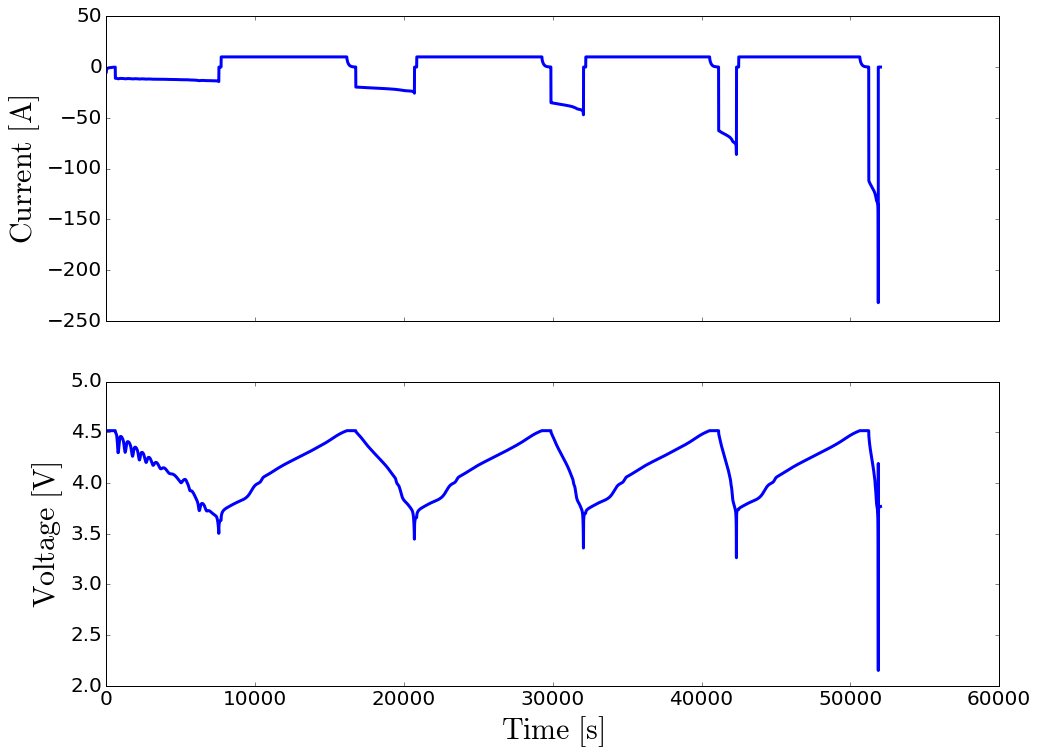

In [7]:
data = initialize_data()
otpt = df.outbot.output.copy()
data['time'] = np.array(otpt['time']) * 60
data['voltage'] = otpt['voltage']
data['current'] = otpt['current']

plot_data(data)